In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle
#%env HDF5_USE_FILE_LOCKING=FALSE
    
import sys
sys.path.insert(1, '../../models/PFN')
from dataset_pfn import PFNDataset

env: HDF5_USE_FILE_LOCKING=FALSE


In [46]:
#Training/Testing path
preprocessed=False
dataset=''
if dataset == '':
    train_path = "../../datasets/train.h5"
    val_path = "../../datasets/val.h5"
    test_path = "../../datasets/test.h5"

#Loading training/testing dataset
train_set = PFNDataset(train_path, preprocessed)
#val_set = PFNDataset(val_path, preprocessed)
#test_set = PFNDataset(test_path, preprocessed)
train_data, _, train_label = train_set[:]
#val_data, _, val_label = val_set[:]
#test_data, _, test_label = test_set[:]
sig_train = train_data[train_label[:,1]==1]
#sig_val = val_data[val_label[:,1]==1]
#sig_test = test_data[test_label[:,1]==1]
bkg_train = train_data[train_label[:,1]==0]
#bkg_val = val_data[val_label[:,1]==0]
#bkg_test = test_data[test_label[:,1]==0]

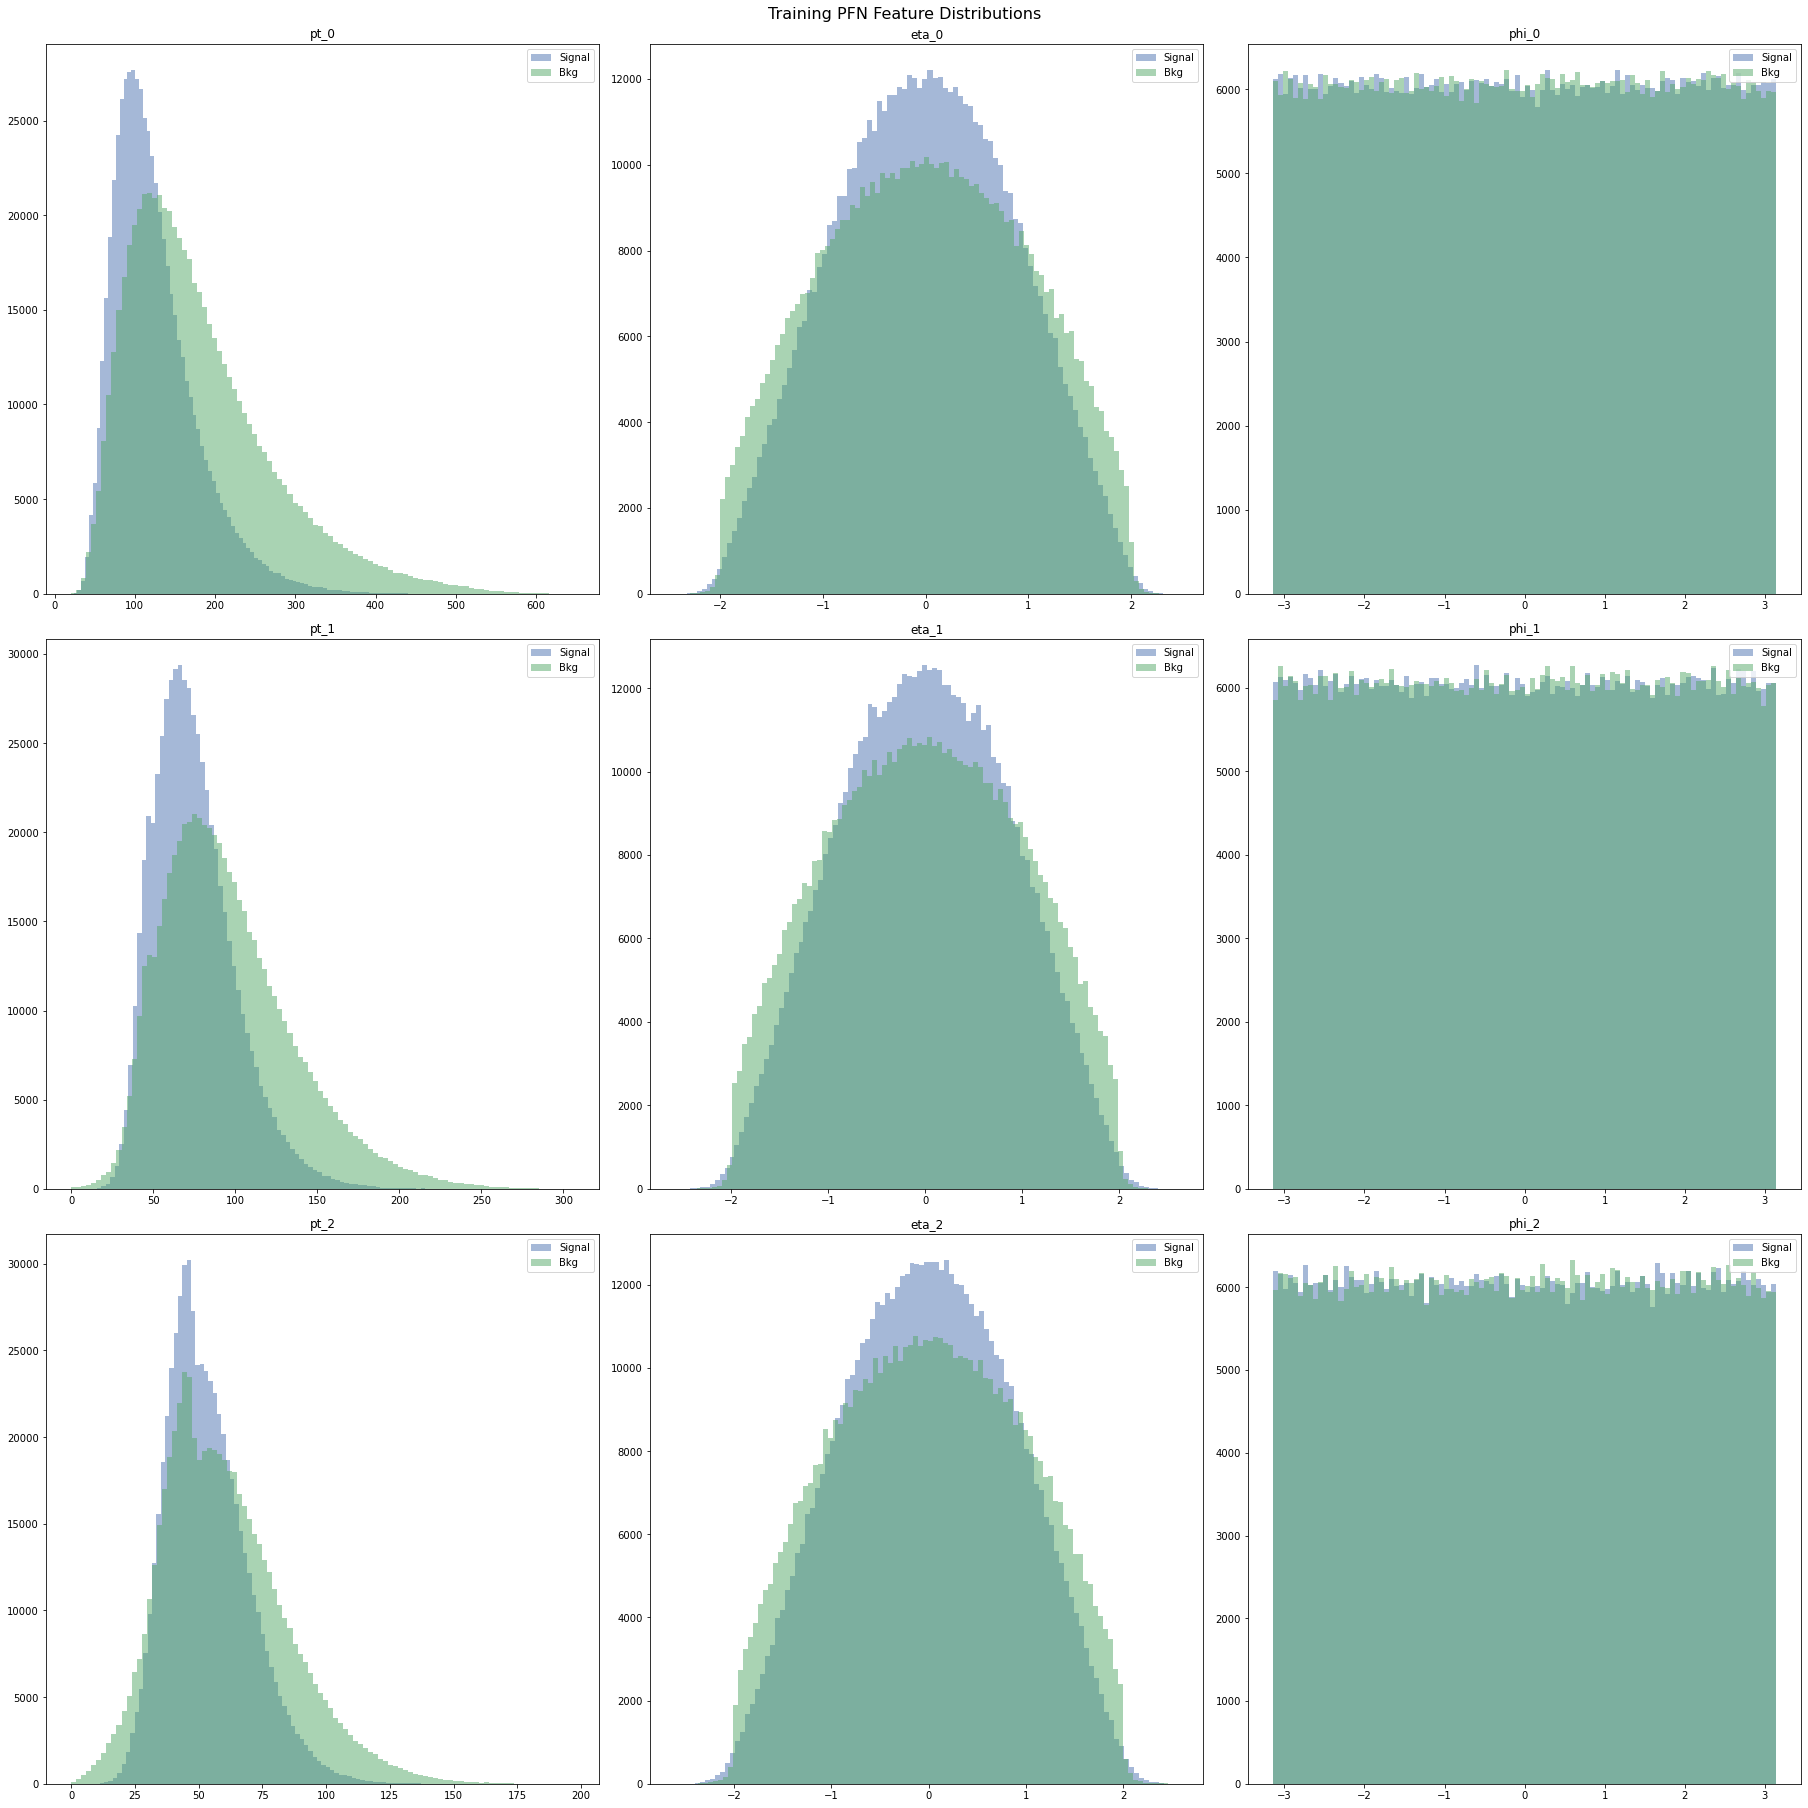

In [47]:
#Train feature distribtuions
labels = ['pt_0', 'eta_0', 'phi_0', 'pt_1', 'eta_1', 'phi_1', 'pt_2', 'eta_2', 'phi_2']
n_bins = 100
plt.style.use('seaborn-deep')
f, a = plt.subplots(3, 3, constrained_layout=True, figsize=(25,25))
f.suptitle('Training PFN Feature Distributions', fontsize=16)
a = a.ravel()
for idx,ax in enumerate(a):
    row = int(idx/3)
    col = idx % 3
    #ax.axes.yaxis.set_ticklabels([])
    ax.hist(sig_train[:, row][:, col].numpy(), bins=n_bins, alpha=0.5, label = 'Signal')
    ax.hist(bkg_train[:, row][:, col].numpy(), bins=n_bins, alpha=0.5, label = 'Bkg')
    ax.set_title(labels[idx])
    ax.legend(loc='upper right')
#Saves feature distribution
plt.savefig('figures/feature_histograms/train_features_preprocessed'+str(preprocessed)+'.png', dpi = 150, bbox_inches = 'tight')

In [37]:
sig_train[:, 0][:, 0]

tensor([124.8895,  80.7867,  55.3729,  ...,  61.4160, 133.3132, 132.0128])